Import Libraries Needed

In [1]:
!pip install pyreadr
import pyreadr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools as it
import pandas as pd
from pandas.plotting import scatter_matrix
import scipy
import numpy as np



Import Specific Functions

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1)

## Wide Dataset

In this example, I used two different datasets with different characteristics. The first is a "wide" dataset with more features but fewer cells. The second is a "Deep" dataset with fewer features and more cells. Below I will display results from each of them. 

In the next cell, I load in the wide dataset and use .head() to verify that it is the correct file with the correct orientation.

In [3]:
trainXdf = pd.read_csv('/Users/tjshruti/Downloads/PLN123_short.csv')
#trainXgenesDF = pd.read_csv('/Users/tjshruti/Downloads/GeneNamesPLN123.csv') 
trainXdf.head(),trainXdf.shape

(   Unnamed: 0              Row.names    V2.x        V5   V6        V7  \
 0           1  AAACCTGAGAGGGCTT_PLN2     CRP  0.728004  0.0  0.498859   
 1           2  AAACCTGAGCCGGTAA_PLN2    TrEC  1.155787  0.0  0.434530   
 2           3  AAACCTGAGCGCTTAT_PLN2    TrEC  0.987962  0.0  1.619479   
 3           4  AAACCTGAGCTGCCCA_PLN2  CapEC1  0.270323  0.0  0.448402   
 4           5  AAACCTGAGGCGCTCT_PLN2    TrEC  0.873254  0.0  0.374109   
 
          V8   V9       V10  V11   ...    V31046  V31047  V31048    V31049  \
 0  0.806498  0.0  1.630390  0.0   ...       0.0       0     0.0  0.000000   
 1  0.787668  0.0  1.474877  0.0   ...       0.0       0     0.0  0.766109   
 2  0.896746  0.0  1.733865  0.0   ...       0.0       0     0.0  0.000000   
 3  1.104601  0.0  1.905492  0.0   ...       0.0       0     0.0  0.000000   
 4  0.539635  0.0  1.324466  0.0   ...       0.0       0     0.0  0.000000   
 
      V31050    V31051  V31052    V31053  V31054  V31055  
 0  0.508397  0.115372   

set as array for further manipulation

In [4]:
trainXarr = np.asarray(trainXdf)

In this example, I am selectively removing cells labeled as ambiguous. This is optional.

In [5]:
drops = trainXarr[:,2]=='ambig'
drops = np.transpose(drops)
drops = [not y for y in drops]
trainXarr = trainXarr[drops]

In [6]:
trainXarr.shape

(7453, 31054)

Separating data from labels

In [7]:
X = trainXarr[:,3:31055]
Y_Arr = trainXarr[:,2]
Y_Arr

array(['CRP', 'TrEC', 'TrEC', ..., 'CapEC2', 'CapEC2', 'HEV'],
      dtype=object)

Converting from string to int datatype, see labels below.

In [8]:
# TrEC = 0
# HEC / HEC late = 1
# CapEC1/2 = 2
# CRP / CRP Early = 3
# HEV = 1
# Pre-Art = 5
# Vn = 4
# Art = 5
# CapIfn = 6


Y_Arr1 = np.zeros((7453, 1))
for x in range(7453):
    if (Y_Arr[x] == 'TrEC'):
        Y_Arr1[x] = 0
    elif (Y_Arr[x] == 'HEC'):
        Y_Arr1[x] = 1
    elif (Y_Arr[x] == 'HEC (late)'):
        Y_Arr1[x] = 1
    elif(Y_Arr[x] == 'CapEC1'):
        Y_Arr1[x] = 2
    elif (Y_Arr[x] == 'CapEC2'):
        Y_Arr1[x] = 2
    elif (Y_Arr[x] == 'CRP'):
        Y_Arr1[x] = 3
    elif (Y_Arr[x] == 'HEV'):
        Y_Arr1[x] = 1
    elif (Y_Arr[x] == 'Pre-Art'):
        Y_Arr1[x] = 5
    elif (Y_Arr[x] == 'CRP (early)'):
        Y_Arr1[x] = 3
    elif(Y_Arr[x] == 'Vn'):
        Y_Arr1[x] = 4
    elif(Y_Arr[x] == 'Art'):
        Y_Arr1[x] = 5
    elif(Y_Arr[x] == 'CapIfn'):
        Y_Arr1[x] = 6
   
        
Y_Arr1

array([[3.],
       [0.],
       [0.],
       ...,
       [2.],
       [2.],
       [1.]])

Create train test split where data and labels are mixed and separated into groups. This allows us to train our model and then verify with remaining data

In [9]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(X, Y_Arr1, train_size = 0.9)

In [10]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((6707, 31051), (6707, 1), (746, 31051), (746, 1))

Below we implement our classifier structure. In this example, there are four layers. The two internal layers can be manipulated for higher accuracy, but the input layer must match the number of features in the dataset, and the output layer must match the total number of classifications to be used.

In [11]:
classifier = Sequential()
classifier.add(Dense(25, activation='relu', input_dim=31051, kernel_initializer='random_normal'))
classifier.add(Dense(10, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(5, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(7, activation='sigmoid', kernel_initializer='random_normal'))

In [12]:
classifier.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                776300    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 42        
Total params: 776,657
Trainable params: 776,657
Non-trainable params: 0
_________________________________________________________________


Now the model is trained on the training sets--which represent 90% of the data inputted. 16 epochs are used in this example, but this can be modified to save time or achieve greater accuracy.

In [13]:
classifier.fit(trainX, trainY, epochs = 16)

W1218 13:56:05.999615 4528575936 deprecation.py:323] From /miniconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 6707 samples
Epoch 1/16
6707/6707 [==============================] - 27s 4ms/sample - loss: 1.2626 - accuracy: 0.5728
Epoch 2/16
6707/6707 [==============================] - 27s 4ms/sample - loss: 0.5741 - accuracy: 0.7761
Epoch 3/16
6707/6707 [==============================] - 27s 4ms/sample - loss: 0.4152 - accuracy: 0.8299
Epoch 4/16
6707/6707 [==============================] - 26s 4ms/sample - loss: 0.3501 - accuracy: 0.8515
Epoch 5/16
6707/6707 [==============================] - 26s 4ms/sample - loss: 0.3000 - accuracy: 0.8622
Epoch 6/16
6707/6707 [==============================] - 26s 4ms/sample - loss: 0.2813 - accuracy: 0.8672
Epoch 7/16
6707/6707 [==============================] - 27s 4ms/sample - loss: 0.2361 - accuracy: 0.8771
Epoch 8/16
6707/6707 [==============================] - 26s 4ms/sample - loss: 0.2144 - accuracy: 0.8828
Epoch 9/16
6707/6707 [==============================] - 26s 4ms/sample - loss: 0.2132 - accuracy: 0.8783
Epoch 10/16
6707/6707 [==========

In [14]:
# Evaluate model accuracy on test data
predictions = classifier.predict_classes(testX)
preds = predictions.tolist()

preds, testY
from sklearn.metrics import accuracy_score
print(accuracy_score(preds, testY)*100)
pd.DataFrame(preds).to_csv('/Users/tjshruti/Downloads/PLN123_predictions_sept13.csv')
pd.DataFrame(testY).to_csv('/Users/tjshruti/Downloads/PLN123_actual_sept13.csv')

86.59517426273459


Set predictions and labels as variables for graphing


In [15]:
p = np.asarray(preds)
t= np.squeeze(testY)


## General Histogram for PLN TEST

Now, we can graph our model's predictions into histograms. Below, I use matplotlib to put classifications into bins. The "general" histogram generated shows overall the actual amount of each cell type versus the prediction. This does not, however, show which classification bin each misclassified cell is moved into. More on that below.

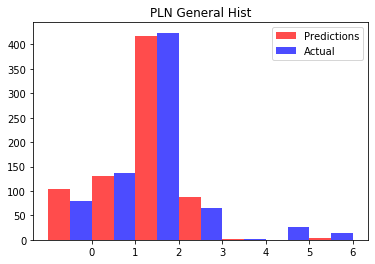

In [16]:
import numpy as np
import matplotlib.pyplot as plt

n_bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5]

colors = ['red', 'blue']
labels = ['Predictions','Actual']
plt.xticks(range(0, 7))
plt.hist((p,t), n_bins, density=False, histtype='bar', color=colors, 
         label=labels, align='left',alpha=0.7, rwidth=5)
plt.legend(prop={'size': 10})
plt.title('PLN General Hist')
plt.show()

# TrEC = 0
# HEC / HEC late = 1
# CapEC1/2 = 2
# CRP / CRP Early = 3
# HEV = 1
# Pre-Art = 5
# Vn = 4
# Art = 5
# CapIfn = 6

## Testing MLN

In the same way as above, I import a dataset and change it into an array. I then drop ambiguous cell types, and separate labels from data. This is an example of a slightly different dataset (MLN vs PLN) used for making predictions with our PLN trained model. IF our model is successful, this shows that it could be cross-tissue applicable.

In [17]:
mln = pd.read_csv('/Users/tjshruti/Downloads/MLN_short.csv')
mln.shape

(2128, 31054)

In [18]:
mln.head()
mln_fit = np.asarray(mln)

In [19]:
drops_mln = mln_fit[:,2]=='ambig'
drops_mln = np.transpose(drops_mln)
drops_mln = [not y for y in drops_mln]
mln_fit = mln_fit[drops_mln]
pd.DataFrame(mln_fit).to_csv('/Users/tjshruti/Downloads/MLN_short_no_Ambig.csv')

In [20]:
Xarr = mln_fit[:,3:31055]
Y_ArrMLN = mln_fit[:,2]
Y_ArrMLN.shape, Xarr.shape

((1833,), (1833, 31051))

In [21]:
predictions = classifier.predict_classes(Xarr)
predsMLN = predictions.tolist()

In [22]:
# TrEC = 0
# HEC / HEC late = 1
# CapEC1/2 = 2
# CRP / CRP Early = 3
# HEV = 1
# Pre-Art = 5
# Vn = 4
# Art = 5
# CapIfn = 6


Y_ArrMLN1 = np.zeros((1833, 1))
for x in range(1833):
    if (Y_ArrMLN[x] == 'TrEC'):
        Y_ArrMLN1[x] = 0
    elif (Y_ArrMLN[x] == 'HEC'):
        Y_ArrMLN1[x] = 1
    elif (Y_ArrMLN[x] == 'HEC (late)'):
        Y_ArrMLN1[x] = 1
    elif(Y_ArrMLN[x] == 'CapEC1'):
        Y_ArrMLN1[x] = 2
    elif (Y_ArrMLN[x] == 'CapEC2'):
        Y_ArrMLN1[x] = 2
    elif (Y_ArrMLN[x] == 'CRP'):
        Y_ArrMLN1[x] = 3
    elif (Y_ArrMLN[x] == 'HEV'):
        Y_ArrMLN1[x] = 1
    elif (Y_ArrMLN[x] == 'Pre-Art'):
        Y_ArrMLN1[x] = 5
    elif (Y_ArrMLN[x] == 'CRP (early)'):
        Y_ArrMLN1[x] = 3
    elif(Y_ArrMLN[x] == 'Vn'):
        Y_ArrMLN1[x] = 4
    elif(Y_ArrMLN[x] == 'Art'):
        Y_ArrMLN1[x] = 5
    elif(Y_ArrMLN[x] == 'CapIfn'):
        Y_ArrMLN1[x] = 6
   
        
Y_ArrMLN1

array([[2.],
       [2.],
       [2.],
       ...,
       [2.],
       [2.],
       [2.]])

In [23]:
pMLN = np.asarray(predsMLN)
tMLN= np.squeeze(Y_ArrMLN1)
tMLN

array([2., 2., 2., ..., 2., 2., 2.])

## General Histogram for MLN TEST


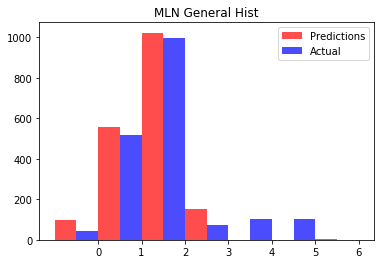

In [24]:
import numpy as np
import matplotlib.pyplot as plt

n_bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5]

colors = ['red', 'blue']
labels = ['Predictions','Actual']
plt.xticks(range(0, 9))
plt.hist((pMLN,tMLN), n_bins, density=False, histtype='bar', color=colors, 
         label=labels, align='left',alpha=0.7, rwidth=5)
plt.legend(prop={'size': 10})
plt.title('MLN General Hist')
plt.show()

In [25]:
#Accuracy Score on MLN Tissue
from sklearn.metrics import accuracy_score
print(accuracy_score(predsMLN, Y_ArrMLN1)*100)
pd.DataFrame(predsMLN).to_csv('/Users/tjshruti/Downloads/MLN1_predictions_sept13.csv')
pd.DataFrame(Y_ArrMLN1).to_csv('/Users/tjshruti/Downloads/MLN1_actual_sept13.csv')

80.03273322422258


The model displayed an 88% accuracy on a biologically different dataset. Based on the histogram, there are clear discrepancies. Let's see where the model had a hard time.

In [26]:
probs = classifier.predict_proba(Xarr)
pd.DataFrame(probs).to_csv('/Users/tjshruti/Downloads/MLN1_Classification_Probabilities1.csv')

For the three cells below, I am creating a dataset where only predictions with a high (>80%) level of accuracy are examined.

In [27]:
probs_barcodes=pd.read_csv('/Users/tjshruti/Downloads/MLN1_Classification_Probabilities_with_index.csv')
probs_barcodes_arr=np.asarray(probs_barcodes)
data=probs_barcodes_arr[:,1:8]
data_answers=probs_barcodes_arr[:,9:10]

In [28]:
data_high_prob = np.zeros((1833))
                          
for i in range(1833):
    for j in range(1,7):
        if data[i,j] > 0.8:
            data_high_prob[i]=1

In [29]:
data_bools = data_high_prob[:]==1
data_only_high_prob= data[data_bools]
data_answers_high_prob=data_answers[data_bools]
data_only_high_prob_index=data_only_high_prob[:,0]


matches=probs_barcodes.loc[probs_barcodes['Index'].isin(data_only_high_prob_index)]
matches_arr = np.asarray(matches)
matches_preds = matches_arr[:,9]
matches_true = matches_arr[:,10]

## High Prob >80% Histogram

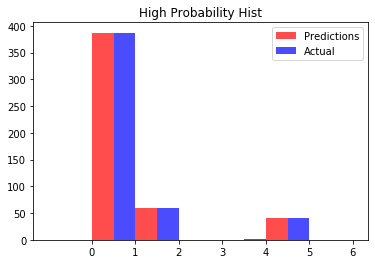

In [30]:
import numpy as np
import matplotlib.pyplot as plt

n_bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5]

colors = ['red', 'blue']
labels = ['Predictions','Actual']
plt.xticks(range(0, 9))
plt.hist((matches_preds,matches_true), n_bins, density=False, histtype='bar', color=colors, 
         label=labels, align='left',alpha=0.7, rwidth=5)
plt.legend(prop={'size': 10})
plt.title('High Probability Hist')
plt.show()

The histogram above shows that when the model is confident in a prediction, it is almost always accurate. Clearly, there are features in certain cell types that are a dead giveaway marker for that cell type.

# Getting Some Cool Histograms

Below, I dive into some specifics for each "general" histogram displayed above. Each class has a blue "actual" bar compared to one or more red "prediction" bars. This allows us to see where the model is going wrong with each specific cell type. The first set of histograms are for the PLN trained model's predictions on the MLN set, and the second set of histograms are for the PLN trained model's predictions on the PLN set (itself)

## --MLN Histograms
    # TrEC = 0
    # HEC / HEC late / HEV = 1
    # CapEC1/2 = 2
    # CRP / CRP Early = 3
    # Vn = 4
    # Pre-Art / Art = 5
    # CapIfn = 6

In [31]:
comb = np.stack((tMLN,pMLN))
comb = np.transpose(comb)
print(comb)

[[2. 2.]
 [2. 2.]
 [2. 2.]
 ...
 [2. 2.]
 [2. 2.]
 [2. 2.]]


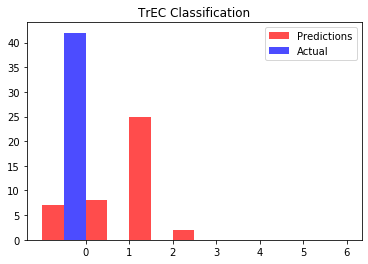

In [32]:
ones = comb[:,0]==0
comb_ones = comb[ones]
comb_ones_preds = comb_ones[:,1]
comb_ones_true = comb_ones[:,0]

n_bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5]

colors = ['red', 'blue']
labels = ['Predictions','Actual']
plt.xticks(range(0, 9))
plt.hist((comb_ones_preds,comb_ones_true), n_bins, density=False, histtype='bar', color=colors, 
         label=labels, align='left',alpha=0.7, rwidth=5)
plt.legend(prop={'size': 10})
plt.title('TrEC Classification')

plt.show()

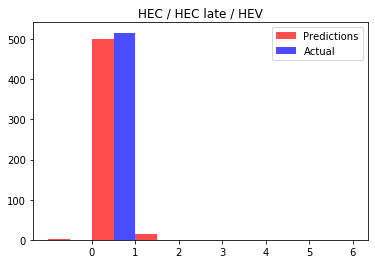

In [33]:
ones = comb[:,0]==1
comb_ones = comb[ones]
comb_ones_preds = comb_ones[:,1]
comb_ones_true = comb_ones[:,0]

n_bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5]

colors = ['red', 'blue']
labels = ['Predictions','Actual']
plt.xticks(range(0, 9))
plt.hist((comb_ones_preds,comb_ones_true), n_bins, density=False, histtype='bar', color=colors, 
         label=labels, align='left',alpha=0.7, rwidth=5)
plt.legend(prop={'size': 10})
plt.title('HEC / HEC late / HEV')

plt.show()

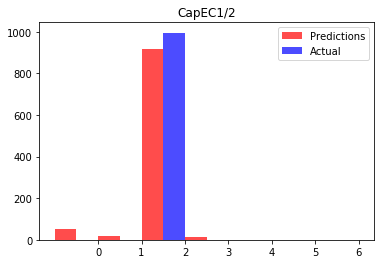

In [34]:
ones = comb[:,0]==2
comb_ones = comb[ones]
comb_ones_preds = comb_ones[:,1]
comb_ones_true = comb_ones[:,0]

n_bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5]

colors = ['red', 'blue']
labels = ['Predictions','Actual']
plt.xticks(range(0, 9))
plt.hist((comb_ones_preds,comb_ones_true), n_bins, density=False, histtype='bar', color=colors, 
         label=labels, align='left',alpha=0.7, rwidth=5)
plt.legend(prop={'size': 10})
plt.title('CapEC1/2')

plt.show()

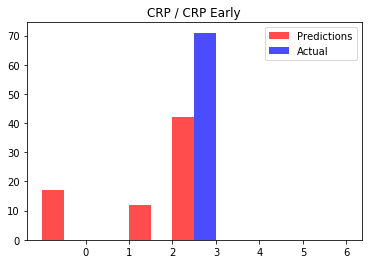

In [35]:
ones = comb[:,0]==3
comb_ones = comb[ones]
comb_ones_preds = comb_ones[:,1]
comb_ones_true = comb_ones[:,0]

n_bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5]

colors = ['red', 'blue']
labels = ['Predictions','Actual']
plt.xticks(range(0, 9))
plt.hist((comb_ones_preds,comb_ones_true), n_bins, density=False, histtype='bar', color=colors, 
         label=labels, align='left',alpha=0.7, rwidth=5)
plt.legend(prop={'size': 10})
plt.title('CRP / CRP Early')

plt.show()

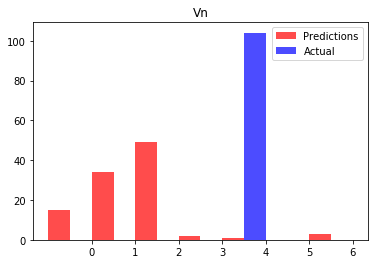

In [36]:
ones = comb[:,0]==4
comb_ones = comb[ones]
comb_ones_preds = comb_ones[:,1]
comb_ones_true = comb_ones[:,0]

n_bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5]

colors = ['red', 'blue']
labels = ['Predictions','Actual']
plt.xticks(range(0, 9))
plt.hist((comb_ones_preds,comb_ones_true), n_bins, density=False, histtype='bar', color=colors, 
         label=labels, align='left',alpha=0.7, rwidth=5)
plt.legend(prop={'size': 10})
plt.title('Vn')

plt.show()

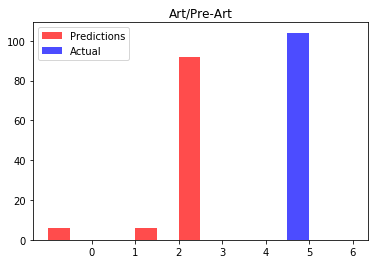

In [37]:
ones = comb[:,0]==5
comb_ones = comb[ones]
comb_ones_preds = comb_ones[:,1]
comb_ones_true = comb_ones[:,0]

n_bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5]

colors = ['red', 'blue']
labels = ['Predictions','Actual']
plt.xticks(range(0, 9))
plt.hist((comb_ones_preds,comb_ones_true), n_bins, density=False, histtype='bar', color=colors, 
         label=labels, align='left',alpha=0.7, rwidth=5)
plt.legend(prop={'size': 10})
plt.title('Art/Pre-Art')

plt.show()

# Histograms for PLN Test

    # TrEC = 0
    # HEC / HEC late = 1
    # CapEC1/2 = 2
    # CRP / CRP Early = 3
    # HEV = 4
    # Pre-Art = 5
    # Vn = 6
    # Art = 7
    # CapIfn = 8

In [38]:
p,t
plncomb = np.stack((t,p))
plncomb = np.transpose(plncomb)

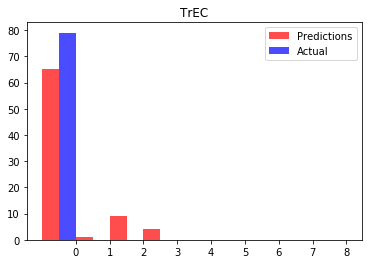

In [39]:
plnones = plncomb[:,0]==0
pln_ones = plncomb[plnones]
pln_ones_preds = pln_ones[:,1]
pln_ones_true = pln_ones[:,0]

n_bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]

colors = ['red', 'blue']
labels = ['Predictions','Actual']
plt.xticks(range(0, 9))
plt.hist((pln_ones_preds,pln_ones_true), n_bins, density=False, histtype='bar', color=colors, 
         label=labels, align='left',alpha=0.7, rwidth=5)
plt.legend(prop={'size': 10})
plt.title('TrEC')

plt.show()

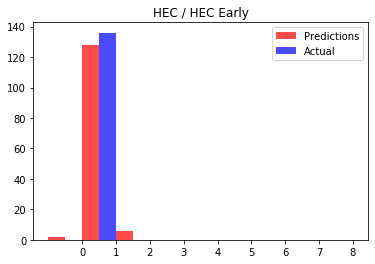

In [40]:
plnones = plncomb[:,0]==1
pln_ones = plncomb[plnones]
pln_ones_preds = pln_ones[:,1]
pln_ones_true = pln_ones[:,0]

n_bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]

colors = ['red', 'blue']
labels = ['Predictions','Actual']
plt.xticks(range(0, 9))
plt.hist((pln_ones_preds,pln_ones_true), n_bins, density=False, histtype='bar', color=colors, 
         label=labels, align='left',alpha=0.7, rwidth=5)
plt.legend(prop={'size': 10})
plt.title('HEC / HEC Early')

plt.show()

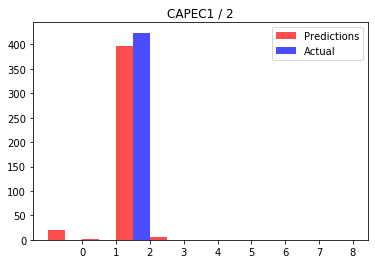

In [41]:
plnones = plncomb[:,0]==2
pln_ones = plncomb[plnones]
pln_ones_preds = pln_ones[:,1]
pln_ones_true = pln_ones[:,0]

n_bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]

colors = ['red', 'blue']
labels = ['Predictions','Actual']
plt.xticks(range(0, 9))
plt.hist((pln_ones_preds,pln_ones_true), n_bins, density=False, histtype='bar', color=colors, 
         label=labels, align='left',alpha=0.7, rwidth=5)
plt.legend(prop={'size': 10})
plt.title('CAPEC1 / 2')

plt.show()

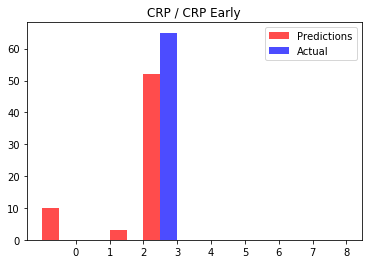

In [42]:
plnones = plncomb[:,0]==3
pln_ones = plncomb[plnones]
pln_ones_preds = pln_ones[:,1]
pln_ones_true = pln_ones[:,0]

n_bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]

colors = ['red', 'blue']
labels = ['Predictions','Actual']
plt.xticks(range(0, 9))
plt.hist((pln_ones_preds,pln_ones_true), n_bins, density=False, histtype='bar', color=colors, 
         label=labels, align='left',alpha=0.7, rwidth=5)
plt.legend(prop={'size': 10})
plt.title('CRP / CRP Early')

plt.show()

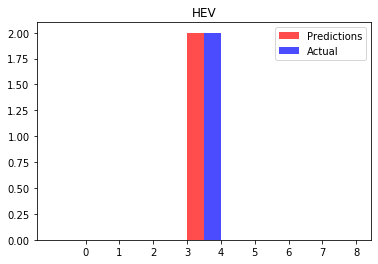

In [43]:
plnones = plncomb[:,0]==4
pln_ones = plncomb[plnones]
pln_ones_preds = pln_ones[:,1]
pln_ones_true = pln_ones[:,0]

n_bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]

colors = ['red', 'blue']
labels = ['Predictions','Actual']
plt.xticks(range(0, 9))
plt.hist((pln_ones_preds,pln_ones_true), n_bins, density=False, histtype='bar', color=colors, 
         label=labels, align='left',alpha=0.7, rwidth=5)
plt.legend(prop={'size': 10})
plt.title('HEV')

plt.show()

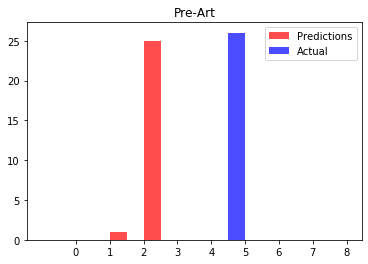

In [44]:
plnones = plncomb[:,0]==5
pln_ones = plncomb[plnones]
pln_ones_preds = pln_ones[:,1]
pln_ones_true = pln_ones[:,0]

n_bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]

colors = ['red', 'blue']
labels = ['Predictions','Actual']
plt.xticks(range(0, 9))
plt.hist((pln_ones_preds,pln_ones_true), n_bins, density=False, histtype='bar', color=colors, 
         label=labels, align='left',alpha=0.7, rwidth=5)
plt.legend(prop={'size': 10})
plt.title('Pre-Art')

plt.show()

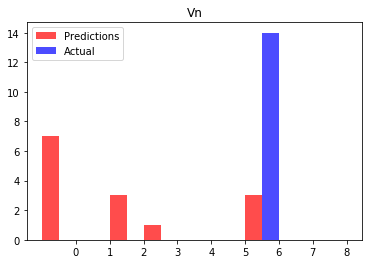

In [45]:
plnones = plncomb[:,0]==6
pln_ones = plncomb[plnones]
pln_ones_preds = pln_ones[:,1]
pln_ones_true = pln_ones[:,0]

n_bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]

colors = ['red', 'blue']
labels = ['Predictions','Actual']
plt.xticks(range(0, 9))
plt.hist((pln_ones_preds,pln_ones_true), n_bins, density=False, histtype='bar', color=colors, 
         label=labels, align='left',alpha=0.7, rwidth=5)
plt.legend(prop={'size': 10})
plt.title('Vn')

plt.show()

## Deep Dataset

Below is an attempt to make a classifier for a different dataset with fewer features and more cells: the "deep" dataset. It was largely unsuccessful and needs further effort.

In [46]:
trainXdf1 = pd.read_csv('/Users/tjshruti/Downloads/PLN123.csv')
trainXgenesDF = pd.read_csv('/Users/tjshruti/Downloads/GeneNamesPLN123.csv')                    

In [47]:
trainXarr1 = np.asarray(trainXdf1)
X1 = trainXarr1[:,7:3087]
Y_Arr1 = trainXarr1[:,3]
Y_Arr1.shape, X1.shape

((7592,), (7592, 3080))

In [48]:
# TrEC(ontPC1_2 and tspUMAP) = 0
# HEC plus (temp) = 1
# CapEC2 = 2
# Vn = 3
# TrEC_Early = 4
# CRP = 5
# HEV(late_Sept1) = 6
# CapEC1 = 7
# CRP(eraly_Aug31)) = 8
# TrEC_Early = 9
# Art = 10
#


Y_Arr2 = np.zeros((7592, 1))
for x in range(7592):
    if (Y_Arr1[x] == 'TrEC'):
        Y_Arr2[x] = 0
    elif (Y_Arr1[x] == 'HEC'):
        Y_Arr2[x] = 1
    elif (Y_Arr1[x] == 'HEC (late)'):
        Y_Arr2[x] = 1
    elif(Y_Arr1[x] == 'CapEC1'):
        Y_Arr2[x] = 2
    elif (Y_Arr1[x] == 'CapEC2'):
        Y_Arr2[x] = 2
    elif (Y_Arr1[x] == 'CRP'):
        Y_Arr2[x] = 3
    elif (Y_Arr1[x] == 'Caplfn'):
        Y_Arr2[x] = 4
    elif (Y_Arr1[x] == 'Pre-Art'):
        Y_Arr2[x] = 5
    elif (Y_Arr1[x] == 'CRP (early)'):
        Y_Arr2[x] = 3
    elif(Y_Arr1[x] == 'Vn'):
        Y_Arr2[x] = 6
    elif(Y_Arr1[x] == 'Art'):
        Y_Arr2[x] = 7
    else:
        Y_Arr2[x] = 8
        
print(Y_Arr2
     )

[[0.]
 [1.]
 [2.]
 ...
 [2.]
 [2.]
 [2.]]


In [49]:
from sklearn.model_selection import train_test_split

trainX1, testX1, trainY1, testY1 = train_test_split(X1, Y_Arr2, train_size = 0.9)

In [50]:
trainX1.shape, trainY1.shape, testX1.shape

((6832, 3080), (6832, 1), (760, 3080))

In [51]:
classifier = Sequential()
classifier.add(Dense(25, activation='relu', input_dim=3080, kernel_initializer='random_normal'))
#classifier.add(Dropout(rate = 0.5))
#classifier.add(Dropout(rate = 0.5))
classifier.add(Dense(9, activation='sigmoid', kernel_initializer='random_normal'))

In [52]:
classifier.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 25)                77025     
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 234       
Total params: 77,259
Trainable params: 77,259
Non-trainable params: 0
_________________________________________________________________


In [53]:
classifier.fit(trainX1, trainY1, epochs = 25)

Train on 6832 samples
Epoch 1/25
6832/6832 [==============================] - 3s 496us/sample - loss: 1.3458 - accuracy: 0.5231
Epoch 2/25
6832/6832 [==============================] - 3s 470us/sample - loss: 0.8382 - accuracy: 0.6734
Epoch 3/25
6832/6832 [==============================] - 3s 463us/sample - loss: 0.7309 - accuracy: 0.7286
Epoch 4/25
6832/6832 [==============================] - 3s 463us/sample - loss: 0.6886 - accuracy: 0.7321
Epoch 5/25
6832/6832 [==============================] - 3s 460us/sample - loss: 0.6775 - accuracy: 0.7373
Epoch 6/25
6832/6832 [==============================] - 3s 461us/sample - loss: 0.6651 - accuracy: 0.7357
Epoch 7/25
6832/6832 [==============================] - 3s 460us/sample - loss: 0.6565 - accuracy: 0.7411
Epoch 8/25
6832/6832 [==============================] - 3s 460us/sample - loss: 0.6586 - accuracy: 0.7425
Epoch 9/25
6832/6832 [==============================] - 3s 462us/sample - loss: 0.6595 - accuracy: 0.7406
Epoch 10/25
6832/6832 [=

In [54]:
# Evaluate model accuracy on test data
predictions1 = classifier.predict_classes(testX1)
preds1 = predictions1.tolist()
preds1, testY1
from sklearn.metrics import accuracy_score
print(accuracy_score(preds1, testY1)*100)

75.6578947368421


Moving forward, I would like to improve the "deep" dataset model and test the model on heart and lung datasets, as well as train seperate models for heart and lung datasets.